In [1]:
#This code computes medians of errors and uses bootstrapping to calculate errors of medians

In [57]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import matplotlib.gridspec as gridspec
import ast
import sys
sys.path.append('../machine-scientist/')
sys.path.append('../machine-scientist/Prior/')
from mcmc import *
from parallel import *
from fit_prior import read_prior_par
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error
from scipy.stats import bootstrap

In [58]:
errors_approximation=pd.read_csv('../../data/'+ 'all_errors_nguyen1x' + '.csv',index_col=0)
display(errors_approximation)

columns=["sigma", "function","rmse_nn_train", "rmse_nn_test", "rmse_mdl_train", "rmse_mdl_test","r"]
errors_approximation=errors_approximation[columns]
display(errors_approximation)

errors_f1=errors_approximation[errors_approximation['function']==1]
errors_02=errors_f1[errors_f1['sigma']==0.02]
display(errors_02)

,sigma,function,mae_nn_train,mae_nn_test,mae_mdl_train,mae_mdl_test,rmse_nn_train,rmse_nn_test,rmse_mdl_train,rmse_mdl_test,n,r
0,0.00,1,0.041645,1.938429,1.355397e-16,7.190016e-16,0.096256,2.273878,2.103031e-16,1.130134e-15,1,0
1,0.00,1,0.049886,2.105638,1.405889e-16,6.344132e-16,0.116285,2.438433,2.134518e-16,1.016382e-15,1,1
2,0.00,1,0.051987,2.129139,1.231654e-16,9.093255e-16,0.121103,2.458621,2.059831e-16,1.128055e-15,1,2
3,0.02,1,0.038515,1.926238,3.238400e-03,2.129294e-01,0.091641,2.270680,6.415863e-03,2.715548e-01,1,0
4,0.02,1,0.058483,2.192715,1.749198e-03,1.656911e-02,0.133382,2.522208,2.392921e-03,1.797497e-02,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
160,0.18,10,0.024106,0.078632,3.500288e-02,4.373102e-02,0.032599,0.087837,4.195916e-02,5.652054e-02,10,1
161,0.18,10,0.020973,0.101032,3.348199e-02,4.278379e-02,0.028642,0.110934,3.753406e-02,5.535585e-02,10,2
162,0.20,10,0.059975,0.254647,3.728207e-02,1.149081e-01,0.071429,0.277439,4.690686e-02,1.310190e-01,10,0
163,0.20,10,0.028298,0.034410,8.814254e-02,6.073678e-02,0.034189,0.042639,1.036397e-01,6.699369e-02,10,1


,sigma,function,rmse_nn_train,rmse_nn_test,rmse_mdl_train,rmse_mdl_test,r
0,0.00,1,0.096256,2.273878,2.103031e-16,1.130134e-15,0
1,0.00,1,0.116285,2.438433,2.134518e-16,1.016382e-15,1
2,0.00,1,0.121103,2.458621,2.059831e-16,1.128055e-15,2
3,0.02,1,0.091641,2.270680,6.415863e-03,2.715548e-01,0
4,0.02,1,0.133382,2.522208,2.392921e-03,1.797497e-02,1
...,...,...,...,...,...,...,...
160,0.18,10,0.032599,0.087837,4.195916e-02,5.652054e-02,1
161,0.18,10,0.028642,0.110934,3.753406e-02,5.535585e-02,2
162,0.20,10,0.071429,0.277439,4.690686e-02,1.310190e-01,0
163,0.20,10,0.034189,0.042639,1.036397e-01,6.699369e-02,1


,sigma,function,rmse_nn_train,rmse_nn_test,rmse_mdl_train,rmse_mdl_test,r
3,0.02,1,0.091641,2.270680,0.006416,0.271555,0
4,0.02,1,0.133382,2.522208,0.002393,0.017975,1
5,0.02,1,0.097643,2.310963,0.001821,0.004658,2


In [61]:
#Melt dataframe to plot
errors_train=errors_approximation[["sigma", "function","rmse_nn_train", "rmse_mdl_train","r"]]
errors_train=pd.melt(errors_train,id_vars=["sigma","function","r"], var_name="error_train",value_name= "value_train")

errors_test=errors_approximation[["sigma", "function","rmse_nn_test", "rmse_mdl_test","r"]]
errors_test=pd.melt(errors_test,id_vars=["sigma","function", "r"], var_name="error_test", value_name= "value_test")

#display(errors_train)
#display(errors_test)

errors_train_f1=errors_train[errors_train['function']==1]
errors_train_02=errors_train_f1[errors_train_f1['sigma']==0.02]
display(errors_train_02)

errors_test_f1=errors_test[errors_test['function']==1]
errors_test_02=errors_test_f1[errors_test_f1['sigma']==0.02]
display(errors_test_02)

#errors_approximation=pd.melt(errors_approximation,id_vars=["sigma","function","rmse_nn_test","rmse_mdl_test"], var_name="error_train",value_name= "value_train")
#errors_approximation=pd.melt(errors_approximation,id_vars=["sigma","function", "error_train", "value_train"], var_name="error_test", value_name= "value_test")

#display(errors_approximation)
#display(errors_approximation[errors_approximation['function']==1])

,sigma,function,r,error_train,value_train
3,0.02,1,0,rmse_nn_train,0.091641
4,0.02,1,1,rmse_nn_train,0.133382
5,0.02,1,2,rmse_nn_train,0.097643
168,0.02,1,0,rmse_mdl_train,0.006416
169,0.02,1,1,rmse_mdl_train,0.002393
170,0.02,1,2,rmse_mdl_train,0.001821


,sigma,function,r,error_test,value_test
3,0.02,1,0,rmse_nn_test,2.270680
4,0.02,1,1,rmse_nn_test,2.522208
5,0.02,1,2,rmse_nn_test,2.310963
168,0.02,1,0,rmse_mdl_test,0.271555
169,0.02,1,1,rmse_mdl_test,0.017975
170,0.02,1,2,rmse_mdl_test,0.004658


In [62]:
errors_train_1=errors_train[errors_train['function']==1]
errors_test_1=errors_test[errors_test['function']==1]

errors_train_5=errors_train[errors_train['function']==5]
errors_test_5=errors_test[errors_test['function']==5]

errors_train_7=errors_train[errors_train['function']==7]
errors_test_7=errors_test[errors_test['function']==7]

errors_train_8=errors_train[errors_train['function']==8]
errors_test_8=errors_test[errors_test['function']==8]

errors_train_10=errors_train[errors_train['function']==10]
errors_test_10=errors_test[errors_test['function']==10]

display(errors_train_1[errors_train_1['sigma']==0.0])

,sigma,function,r,error_train,value_train
0,0.0,1,0,rmse_nn_train,9.625561e-02
1,0.0,1,1,rmse_nn_train,1.162853e-01
2,0.0,1,2,rmse_nn_train,1.211028e-01
165,0.0,1,0,rmse_mdl_train,2.103031e-16
166,0.0,1,1,rmse_mdl_train,2.134518e-16
167,0.0,1,2,rmse_mdl_train,2.059831e-16


In [63]:
#Plot results
#Define figure size in cm                                                                           
cm = 1/2.54 #convert inch to cm                                                                     
width = 8*cm; height=6*cm

Extensions=['.png', '.pdf']

#Fonts and sizes                                                                                    
size_axis=12;size_ticks=10;size_title=5
line_w=1;marker_s=3 #width and marker size                                                          
m_size=6

output_path='../../results/'

resamples=100000; bs_seed=1111
ymin=2e-4;ymax=0.75

(array([1.e-19, 1.e-17, 1.e-15, 1.e-13, 1.e-11, 1.e-09, 1.e-07, 1.e-05,
        1.e-03, 1.e-01, 1.e+01, 1.e+03]),
 [Text(0, 1e-19, '$\\mathdefault{10^{-19}}$'),
  Text(0, 1e-17, '$\\mathdefault{10^{-17}}$'),
  Text(0, 1e-15, '$\\mathdefault{10^{-15}}$'),
  Text(0, 1e-13, '$\\mathdefault{10^{-13}}$'),
  Text(0, 1e-11, '$\\mathdefault{10^{-11}}$'),
  Text(0, 9.999999999999999e-10, '$\\mathdefault{10^{-9}}$'),
  Text(0, 1e-07, '$\\mathdefault{10^{-7}}$'),
  Text(0, 9.999999999999999e-06, '$\\mathdefault{10^{-5}}$'),
  Text(0, 0.001, '$\\mathdefault{10^{-3}}$'),
  Text(0, 0.09999999999999999, '$\\mathdefault{10^{-1}}$'),
  Text(0, 10.0, '$\\mathdefault{10^{1}}$'),
  Text(0, 1000.0, '$\\mathdefault{10^{3}}$')])

<Figure size 944.882x708.661 with 0 Axes>

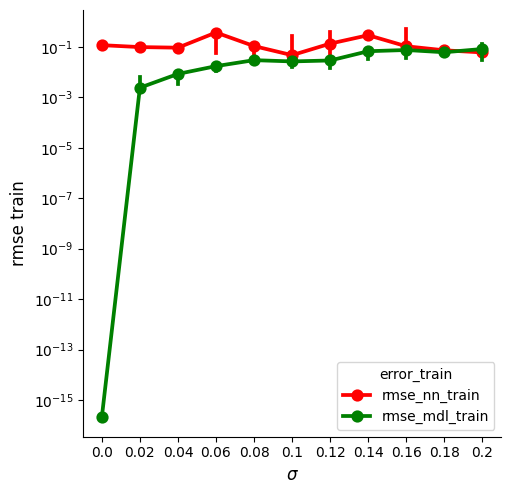

In [66]:
#nguyen 1 - rmse train
fig=figure(figsize=(width,height), dpi=300)
sns.catplot(data=errors_train_1, x='sigma', y='value_train', hue='error_train', kind='point', estimator='median',
            errorbar=('ci', 95),n_boot=resamples, seed=bs_seed, palette=['red', 'green'],legend_out=False)


plt.yscale("log")

#labels, limits, and ticks
plt.xlabel(r'$\sigma$',fontsize=size_axis) 
plt.ylabel('rmse train',fontsize=size_axis)
plt.xticks(fontsize=size_ticks);plt.yticks(fontsize=size_ticks)
#plt.legend(loc='lower right',fontsize=size_ticks,frameon=False)

#plt.ylim(ymin,ymax)


#name_fig='tanh_rmse_train.svg'
#plt.savefig(output_path+name_fig,dpi=300)
#fig=figure(figsize=(2*width,2*height), dpi=300)
#sns.catplot(data=errors_train_1, x='sigma', y='value_train', hue="error_train",palette=['red', 'green'],legend_out=False)
#plt.yscale("log")
#plt.ylim(1e-2,1)
#plt.show()

(array([1.e-11, 1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04,
        1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01]),
 [Text(0, 1e-11, '$\\mathdefault{10^{-11}}$'),
  Text(0, 9.999999999999999e-11, '$\\mathdefault{10^{-10}}$'),
  Text(0, 9.999999999999999e-10, '$\\mathdefault{10^{-9}}$'),
  Text(0, 1e-08, '$\\mathdefault{10^{-8}}$'),
  Text(0, 1e-07, '$\\mathdefault{10^{-7}}$'),
  Text(0, 1e-06, '$\\mathdefault{10^{-6}}$'),
  Text(0, 9.999999999999999e-06, '$\\mathdefault{10^{-5}}$'),
  Text(0, 9.999999999999999e-05, '$\\mathdefault{10^{-4}}$'),
  Text(0, 0.001, '$\\mathdefault{10^{-3}}$'),
  Text(0, 0.01, '$\\mathdefault{10^{-2}}$'),
  Text(0, 0.09999999999999999, '$\\mathdefault{10^{-1}}$'),
  Text(0, 1.0, '$\\mathdefault{10^{0}}$'),
  Text(0, 10.0, '$\\mathdefault{10^{1}}$')])

<Figure size 944.882x708.661 with 0 Axes>

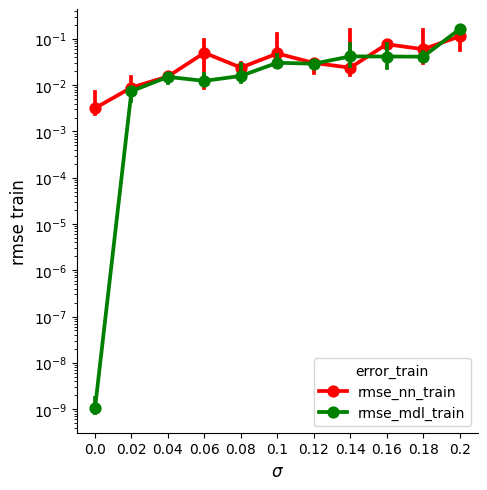

In [67]:
#nguyen 5 - train
fig=figure(figsize=(width,height), dpi=300)
sns.catplot(data=errors_train_5, x='sigma', y='value_train', hue='error_train', kind='point', estimator='median',
            errorbar=('ci', 95),n_boot=resamples, seed=bs_seed, palette=['red', 'green'],legend_out=False)


plt.yscale("log")

#labels, limits, and ticks
plt.xlabel(r'$\sigma$',fontsize=size_axis) 
plt.ylabel('rmse train',fontsize=size_axis)
plt.xticks(fontsize=size_ticks);plt.yticks(fontsize=size_ticks)
#plt.legend(loc='lower right',fontsize=size_ticks,frameon=False)

#plt.ylim(ymin,ymax)


#name_fig='tanh_rmse_train.svg'
#plt.savefig(output_path+name_fig,dpi=300)
#fig=figure(figsize=(2*width,2*height), dpi=300)
#sns.catplot(data=errors_train_1, x='sigma', y='value_train', hue="error_train",palette=['red', 'green'],legend_out=False)
#plt.yscale("log")
#plt.ylim(1e-2,1)
#plt.show()

<Figure size 944.882x708.661 with 0 Axes>

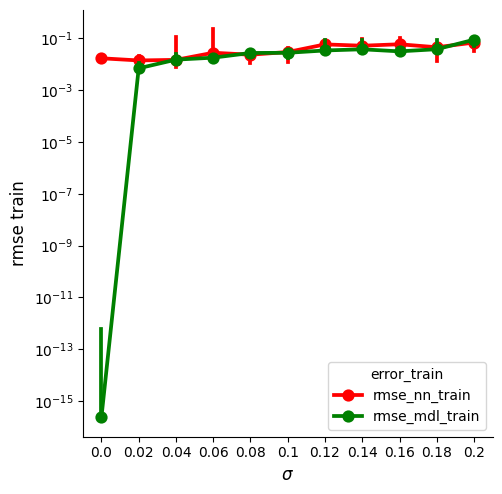

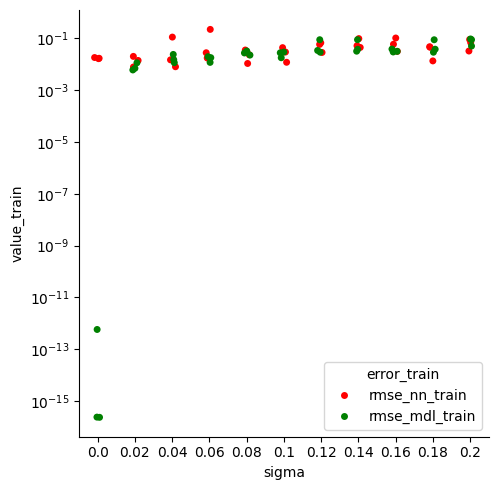

In [75]:
#nguyen 7 - train
fig=figure(figsize=(width,height), dpi=300)
sns.catplot(data=errors_train_7, x='sigma', y='value_train', hue='error_train', kind='point', estimator='median',
            errorbar=('ci', 95),n_boot=resamples, seed=bs_seed, palette=['red', 'green'],legend_out=False)


plt.yscale("log")

#labels, limits, and ticks
plt.xlabel(r'$\sigma$',fontsize=size_axis) 
plt.ylabel('rmse train',fontsize=size_axis)
plt.xticks(fontsize=size_ticks);plt.yticks(fontsize=size_ticks)
#plt.legend(loc='lower right',fontsize=size_ticks,frameon=False)

#plt.ylim(ymin,ymax)


#name_fig='tanh_rmse_train.svg'
#plt.savefig(output_path+name_fig,dpi=300)
#fig=figure(figsize=(2*width,2*height), dpi=300)
sns.catplot(data=errors_train_7, x='sigma', y='value_train', hue="error_train",palette=['red', 'green'],legend_out=False)
plt.yscale("log")
#plt.ylim(1e-2,1)
#plt.show()

<Figure size 944.882x708.661 with 0 Axes>

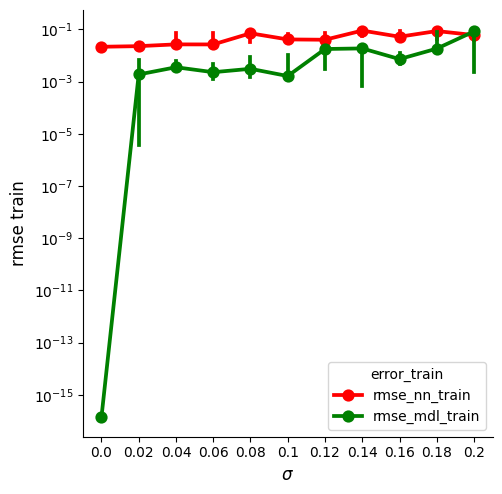

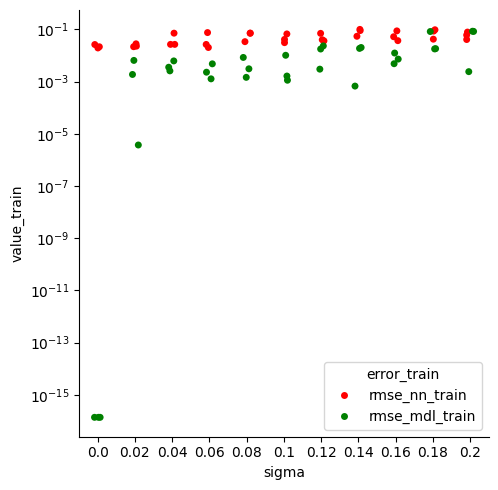

In [76]:
#nguyen 8 - train
fig=figure(figsize=(width,height), dpi=300)
sns.catplot(data=errors_train_8, x='sigma', y='value_train', hue='error_train', kind='point', estimator='median',
            errorbar=('ci', 95),n_boot=resamples, seed=bs_seed, palette=['red', 'green'],legend_out=False)


plt.yscale("log")

#labels, limits, and ticks
plt.xlabel(r'$\sigma$',fontsize=size_axis) 
plt.ylabel('rmse train',fontsize=size_axis)
plt.xticks(fontsize=size_ticks);plt.yticks(fontsize=size_ticks)
#plt.legend(loc='lower right',fontsize=size_ticks,frameon=False)

#plt.ylim(ymin,ymax)


#name_fig='tanh_rmse_train.svg'
#plt.savefig(output_path+name_fig,dpi=300)
#fig=figure(figsize=(2*width,2*height), dpi=300)
sns.catplot(data=errors_train_8, x='sigma', y='value_train', hue="error_train",palette=['red', 'green'],legend_out=False)
plt.yscale("log")
#plt.ylim(1e-2,1)
#plt.show()

(array([1.e-19, 1.e-17, 1.e-15, 1.e-13, 1.e-11, 1.e-09, 1.e-07, 1.e-05,
        1.e-03, 1.e-01, 1.e+01, 1.e+03]),
 [Text(0, 1e-19, '$\\mathdefault{10^{-19}}$'),
  Text(0, 1e-17, '$\\mathdefault{10^{-17}}$'),
  Text(0, 1e-15, '$\\mathdefault{10^{-15}}$'),
  Text(0, 1e-13, '$\\mathdefault{10^{-13}}$'),
  Text(0, 1e-11, '$\\mathdefault{10^{-11}}$'),
  Text(0, 9.999999999999999e-10, '$\\mathdefault{10^{-9}}$'),
  Text(0, 1e-07, '$\\mathdefault{10^{-7}}$'),
  Text(0, 9.999999999999999e-06, '$\\mathdefault{10^{-5}}$'),
  Text(0, 0.001, '$\\mathdefault{10^{-3}}$'),
  Text(0, 0.09999999999999999, '$\\mathdefault{10^{-1}}$'),
  Text(0, 10.0, '$\\mathdefault{10^{1}}$'),
  Text(0, 1000.0, '$\\mathdefault{10^{3}}$')])

<Figure size 944.882x708.661 with 0 Axes>

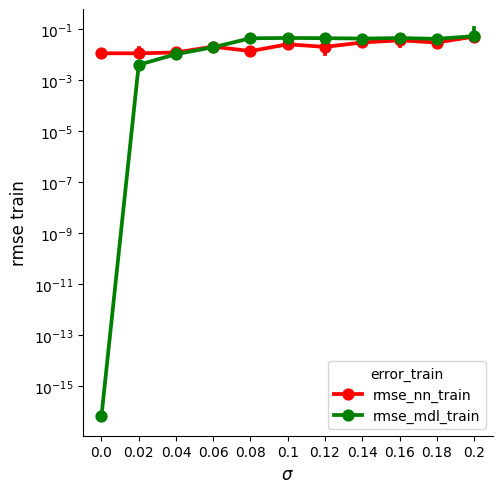

In [70]:
#nguyen 10 - train
fig=figure(figsize=(width,height), dpi=300)
sns.catplot(data=errors_train_10, x='sigma', y='value_train', hue='error_train', kind='point', estimator='median',
            errorbar=('ci', 95),n_boot=resamples, seed=bs_seed, palette=['red', 'green'],legend_out=False)


plt.yscale("log")

#labels, limits, and ticks
plt.xlabel(r'$\sigma$',fontsize=size_axis) 
plt.ylabel('rmse train',fontsize=size_axis)
plt.xticks(fontsize=size_ticks);plt.yticks(fontsize=size_ticks)
#plt.legend(loc='lower right',fontsize=size_ticks,frameon=False)

#plt.ylim(ymin,ymax)


#name_fig='tanh_rmse_train.svg'
#plt.savefig(output_path+name_fig,dpi=300)
#fig=figure(figsize=(2*width,2*height), dpi=300)
#sns.catplot(data=errors_train_1, x='sigma', y='value_train', hue="error_train",palette=['red', 'green'],legend_out=False)
#plt.yscale("log")
#plt.ylim(1e-2,1)
#plt.show()

(array([1.e-18, 1.e-16, 1.e-14, 1.e-12, 1.e-10, 1.e-08, 1.e-06, 1.e-04,
        1.e-02, 1.e+00, 1.e+02, 1.e+04]),
 [Text(0, 9.999999999999999e-19, '$\\mathdefault{10^{-18}}$'),
  Text(0, 1e-16, '$\\mathdefault{10^{-16}}$'),
  Text(0, 1e-14, '$\\mathdefault{10^{-14}}$'),
  Text(0, 1e-12, '$\\mathdefault{10^{-12}}$'),
  Text(0, 9.999999999999999e-11, '$\\mathdefault{10^{-10}}$'),
  Text(0, 1e-08, '$\\mathdefault{10^{-8}}$'),
  Text(0, 1e-06, '$\\mathdefault{10^{-6}}$'),
  Text(0, 9.999999999999999e-05, '$\\mathdefault{10^{-4}}$'),
  Text(0, 0.01, '$\\mathdefault{10^{-2}}$'),
  Text(0, 1.0, '$\\mathdefault{10^{0}}$'),
  Text(0, 100.0, '$\\mathdefault{10^{2}}$'),
  Text(0, 10000.0, '$\\mathdefault{10^{4}}$')])

<Figure size 944.882x708.661 with 0 Axes>

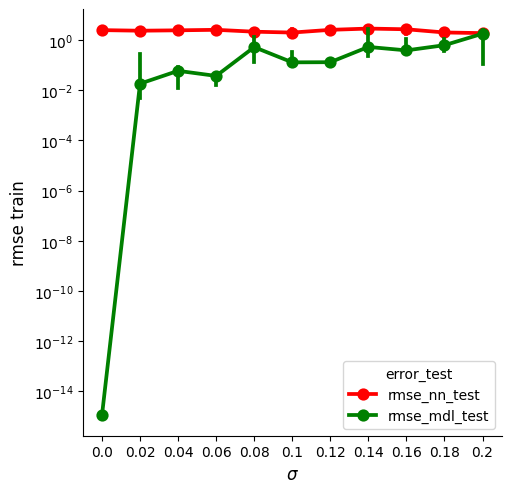

In [77]:
#nguyen 1 - rmse test
fig=figure(figsize=(width,height), dpi=300)
sns.catplot(data=errors_test_1, x='sigma', y='value_test', hue="error_test", kind='point', estimator='median',
            errorbar=('ci', 95),n_boot=resamples, seed=bs_seed, palette=['red', 'green'],legend_out=False)


plt.yscale("log")

#labels, limits, and ticks
plt.xlabel(r'$\sigma$',fontsize=size_axis) 
plt.ylabel('rmse train',fontsize=size_axis)
plt.xticks(fontsize=size_ticks);plt.yticks(fontsize=size_ticks)
#plt.legend(loc='lower right',fontsize=size_ticks,frameon=False)

#plt.ylim(ymin,ymax)


#name_fig='tanh_rmse_train.svg'
#plt.savefig(output_path+name_fig,dpi=300)
#sns.catplot(data=errors_test_1, x='sigma', y='value_test', hue="error_test",palette=['red', 'green'],legend_out=False)
#plt.yscale("log")
#plt.ylim(1e-5,1)
#plt.savefig(output_path+'dist_train_tanh',dpi=300)
#plt.show()

(array([1.e-12, 1.e-10, 1.e-08, 1.e-06, 1.e-04, 1.e-02, 1.e+00, 1.e+02,
        1.e+04]),
 [Text(0, 1e-12, '$\\mathdefault{10^{-12}}$'),
  Text(0, 9.999999999999999e-11, '$\\mathdefault{10^{-10}}$'),
  Text(0, 1e-08, '$\\mathdefault{10^{-8}}$'),
  Text(0, 1e-06, '$\\mathdefault{10^{-6}}$'),
  Text(0, 9.999999999999999e-05, '$\\mathdefault{10^{-4}}$'),
  Text(0, 0.01, '$\\mathdefault{10^{-2}}$'),
  Text(0, 1.0, '$\\mathdefault{10^{0}}$'),
  Text(0, 100.0, '$\\mathdefault{10^{2}}$'),
  Text(0, 10000.0, '$\\mathdefault{10^{4}}$')])

<Figure size 944.882x708.661 with 0 Axes>

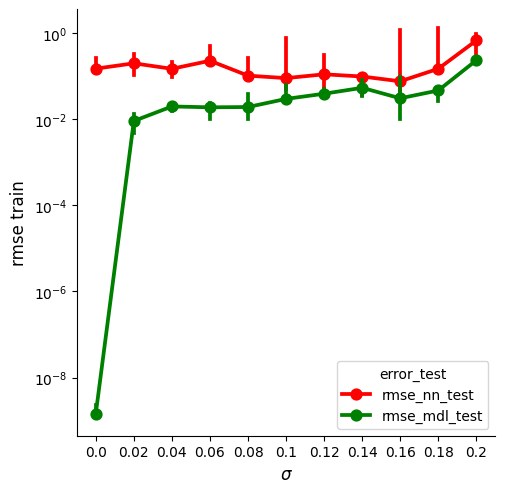

In [71]:
#nguyen 5 - rmse test
fig=figure(figsize=(width,height), dpi=300)
sns.catplot(data=errors_test_5, x='sigma', y='value_test', hue="error_test", kind='point', estimator='median',
            errorbar=('ci', 95),n_boot=resamples, seed=bs_seed, palette=['red', 'green'],legend_out=False)


plt.yscale("log")

#labels, limits, and ticks
plt.xlabel(r'$\sigma$',fontsize=size_axis) 
plt.ylabel('rmse train',fontsize=size_axis)
plt.xticks(fontsize=size_ticks);plt.yticks(fontsize=size_ticks)
#plt.legend(loc='lower right',fontsize=size_ticks,frameon=False)

#plt.ylim(ymin,ymax)


#name_fig='tanh_rmse_train.svg'
#plt.savefig(output_path+name_fig,dpi=300)
#sns.catplot(data=errors_test_1, x='sigma', y='value_test', hue="error_test",palette=['red', 'green'],legend_out=False)
#plt.yscale("log")
#plt.ylim(1e-5,1)
#plt.savefig(output_path+'dist_train_tanh',dpi=300)
#plt.show()

<Figure size 944.882x708.661 with 0 Axes>

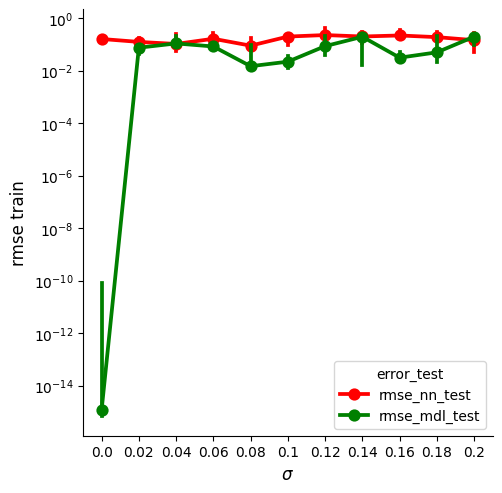

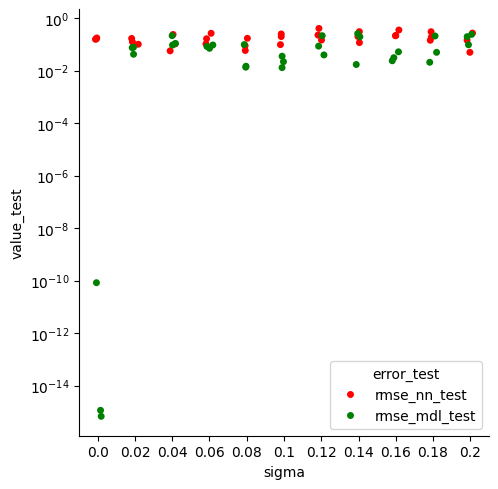

In [79]:
#nguyen 7 - rmse test
fig=figure(figsize=(width,height), dpi=300)
sns.catplot(data=errors_test_7, x='sigma', y='value_test', hue="error_test", kind='point', estimator='median',
            errorbar=('ci', 95),n_boot=resamples, seed=bs_seed, palette=['red', 'green'],legend_out=False)


plt.yscale("log")

#labels, limits, and ticks
plt.xlabel(r'$\sigma$',fontsize=size_axis) 
plt.ylabel('rmse train',fontsize=size_axis)
plt.xticks(fontsize=size_ticks);plt.yticks(fontsize=size_ticks)
#plt.legend(loc='lower right',fontsize=size_ticks,frameon=False)

#plt.ylim(ymin,ymax)


#name_fig='tanh_rmse_train.svg'
#plt.savefig(output_path+name_fig,dpi=300)
sns.catplot(data=errors_test_7, x='sigma', y='value_test', hue="error_test",palette=['red', 'green'],legend_out=False)
plt.yscale("log")
#plt.ylim(1e-5,1)
#plt.savefig(output_path+'dist_train_tanh',dpi=300)
#plt.show()

(array([1.e-19, 1.e-17, 1.e-15, 1.e-13, 1.e-11, 1.e-09, 1.e-07, 1.e-05,
        1.e-03, 1.e-01, 1.e+01, 1.e+03]),
 [Text(0, 1e-19, '$\\mathdefault{10^{-19}}$'),
  Text(0, 1e-17, '$\\mathdefault{10^{-17}}$'),
  Text(0, 1e-15, '$\\mathdefault{10^{-15}}$'),
  Text(0, 1e-13, '$\\mathdefault{10^{-13}}$'),
  Text(0, 1e-11, '$\\mathdefault{10^{-11}}$'),
  Text(0, 9.999999999999999e-10, '$\\mathdefault{10^{-9}}$'),
  Text(0, 1e-07, '$\\mathdefault{10^{-7}}$'),
  Text(0, 9.999999999999999e-06, '$\\mathdefault{10^{-5}}$'),
  Text(0, 0.001, '$\\mathdefault{10^{-3}}$'),
  Text(0, 0.09999999999999999, '$\\mathdefault{10^{-1}}$'),
  Text(0, 10.0, '$\\mathdefault{10^{1}}$'),
  Text(0, 1000.0, '$\\mathdefault{10^{3}}$')])

<Figure size 944.882x708.661 with 0 Axes>

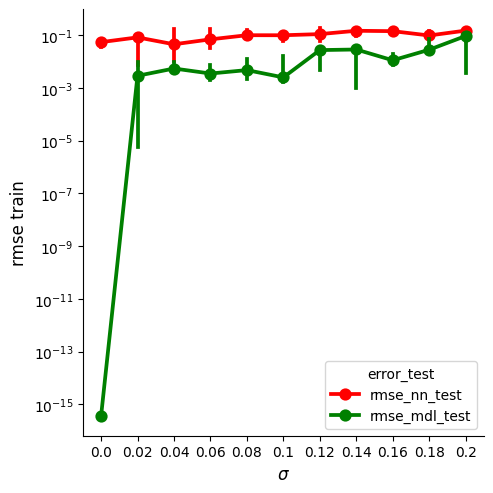

In [73]:
#nguyen 8 - rmse test
fig=figure(figsize=(width,height), dpi=300)
sns.catplot(data=errors_test_8, x='sigma', y='value_test', hue="error_test", kind='point', estimator='median',
            errorbar=('ci', 95),n_boot=resamples, seed=bs_seed, palette=['red', 'green'],legend_out=False)


plt.yscale("log")

#labels, limits, and ticks
plt.xlabel(r'$\sigma$',fontsize=size_axis) 
plt.ylabel('rmse train',fontsize=size_axis)
plt.xticks(fontsize=size_ticks);plt.yticks(fontsize=size_ticks)
#plt.legend(loc='lower right',fontsize=size_ticks,frameon=False)

#plt.ylim(ymin,ymax)


#name_fig='tanh_rmse_train.svg'
#plt.savefig(output_path+name_fig,dpi=300)
#sns.catplot(data=errors_test_1, x='sigma', y='value_test', hue="error_test",palette=['red', 'green'],legend_out=False)
#plt.yscale("log")
#plt.ylim(1e-5,1)
#plt.savefig(output_path+'dist_train_tanh',dpi=300)
#plt.show()

(array([1.e-19, 1.e-17, 1.e-15, 1.e-13, 1.e-11, 1.e-09, 1.e-07, 1.e-05,
        1.e-03, 1.e-01, 1.e+01, 1.e+03]),
 [Text(0, 1e-19, '$\\mathdefault{10^{-19}}$'),
  Text(0, 1e-17, '$\\mathdefault{10^{-17}}$'),
  Text(0, 1e-15, '$\\mathdefault{10^{-15}}$'),
  Text(0, 1e-13, '$\\mathdefault{10^{-13}}$'),
  Text(0, 1e-11, '$\\mathdefault{10^{-11}}$'),
  Text(0, 9.999999999999999e-10, '$\\mathdefault{10^{-9}}$'),
  Text(0, 1e-07, '$\\mathdefault{10^{-7}}$'),
  Text(0, 9.999999999999999e-06, '$\\mathdefault{10^{-5}}$'),
  Text(0, 0.001, '$\\mathdefault{10^{-3}}$'),
  Text(0, 0.09999999999999999, '$\\mathdefault{10^{-1}}$'),
  Text(0, 10.0, '$\\mathdefault{10^{1}}$'),
  Text(0, 1000.0, '$\\mathdefault{10^{3}}$')])

<Figure size 944.882x708.661 with 0 Axes>

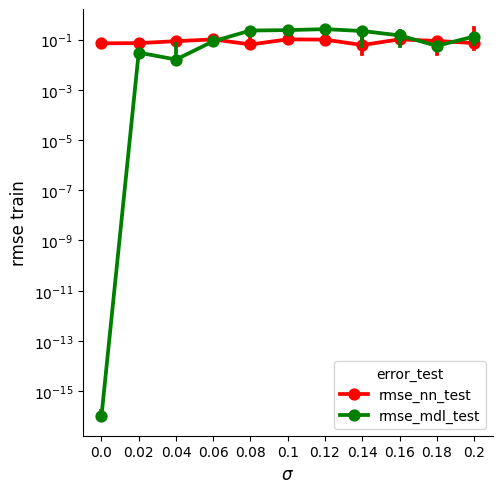

In [74]:
#nguyen 10 - rmse test
fig=figure(figsize=(width,height), dpi=300)
sns.catplot(data=errors_test_10, x='sigma', y='value_test', hue="error_test", kind='point', estimator='median',
            errorbar=('ci', 95),n_boot=resamples, seed=bs_seed, palette=['red', 'green'],legend_out=False)


plt.yscale("log")

#labels, limits, and ticks
plt.xlabel(r'$\sigma$',fontsize=size_axis) 
plt.ylabel('rmse train',fontsize=size_axis)
plt.xticks(fontsize=size_ticks);plt.yticks(fontsize=size_ticks)
#plt.legend(loc='lower right',fontsize=size_ticks,frameon=False)

#plt.ylim(ymin,ymax)


#name_fig='tanh_rmse_train.svg'
#plt.savefig(output_path+name_fig,dpi=300)
#sns.catplot(data=errors_test_1, x='sigma', y='value_test', hue="error_test",palette=['red', 'green'],legend_out=False)
#plt.yscale("log")
#plt.ylim(1e-5,1)
#plt.savefig(output_path+'dist_train_tanh',dpi=300)
#plt.show()